In [ ]:
# !pip install tf-nightly

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. SVM

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      280 non-null    int64  
 1   pred1     280 non-null    float64
 2   pred1r    280 non-null    float64
 3   pred2     280 non-null    float64
 4   pred2r    280 non-null    float64
 5   pred3     280 non-null    float64
 6   pred3r    280 non-null    float64
 7   result01  280 non-null    float64
 8   result02  280 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 19.8 KB

          C  gamma   kernel  mean_test_score
221   50.0  100.0      rbf         0.780952
253  100.0  100.0      rbf         0.771429
181   25.0   25.0      rbf         0.766667
189   25.0  100.0      rbf         0.766667
179   25.0   10.0     poly         0.761905
..     ...    ...      ...              ...
114    1.0   10.0  sigmoid         0.247619
178   25.0   10.0  sigmoid         0.228571
242  100.0   10.0 

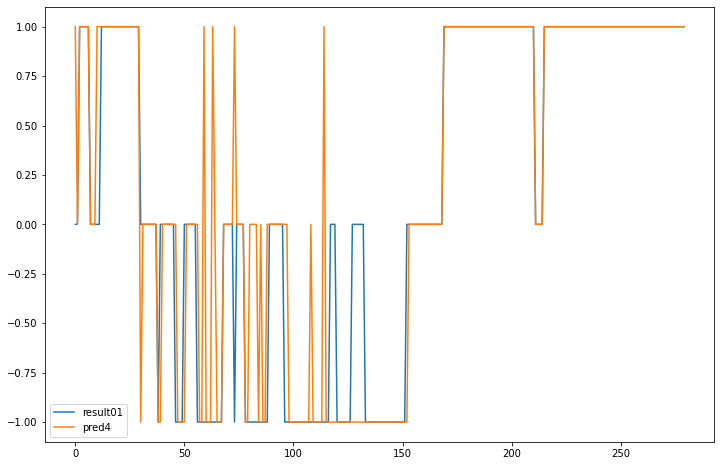

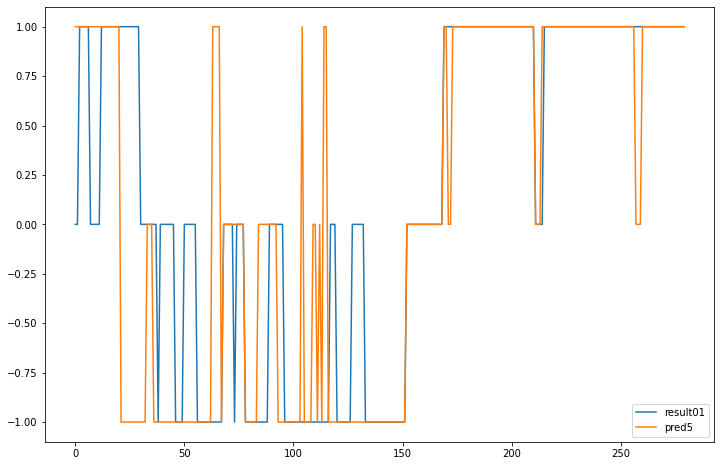

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/TSLA_dataset00.csv")
df.info()

from sklearn.model_selection import train_test_split

X = df.iloc[:,1:7].values
y = df['result02'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(random_state=0)
parameters = {'kernel' : ['linear','rbf', 'sigmoid','poly'],
    'C' : [0.001,0.01,0.1,1,10,25,50,100],
    'gamma' : [0.001,0.01,0.1,1,10,25,50,100]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv=5)
grid_svm.fit(X_train,y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
results = result.sort_values(by='mean_test_score', ascending=False)
print("\n",results)
print("\n최적 파라미터 값을 적용합니다 ...\n")

data = results.values[0]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc4 = SVC(C = C, gamma = gamma, kernel = kernel)
svc4.fit(X_train, y_train)

print("훈련 정확도 :", svc4.score(X_train, y_train))
print("예측 정확도 :", svc4.score(X_test, y_test))

from sklearn.metrics import confusion_matrix

prediction = svc4.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)

print("\n다섯 번째 파라미터 값을 적용합니다 ...\n")

data = results.values[4]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc5 = SVC(C = C, gamma = gamma, kernel = kernel)
svc5.fit(X_train, y_train)

print("훈련 정확도 :", svc5.score(X_train, y_train))
print("예측 정확도 :", svc5.score(X_test, y_test))

from sklearn.metrics import confusion_matrix

prediction = svc5.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)
print("\n")

model4_pred = svc4.predict(X)
model5_pred = svc5.predict(X)
pred_04 = np.zeros(len(model4_pred))
pred_05 = np.zeros(len(model5_pred))

for i in range(len(model4_pred)) :
  pred_04[i] = model4_pred[i]
  pred_05[i] = model5_pred[i]

df['pred4'] = pd.Series(pred_04)
df['pred5'] = pd.Series(pred_05)

df.to_csv("/content/gdrive/My Drive/TSLA_dataset2.csv", index=False)

df = pd.read_csv("/content/gdrive/My Drive/TSLA_dataset2.csv")
print(df)

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred4'], label = 'pred4')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred5'], label = 'pred5')
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/SBUX_dataset00.csv")
df.info()

from sklearn.model_selection import train_test_split

X = df.iloc[:,1:7].values
y = df['result02'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(random_state=0)
parameters = {'kernel' : ['linear','rbf', 'sigmoid','poly'],
    'C' : [0.001,0.01,0.1,1,10,25,50,100],
    'gamma' : [0.001,0.01,0.1,1,10,25,50,100]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv=5)
grid_svm.fit(X_train,y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
results = result.sort_values(by='mean_test_score', ascending=False)
print("\n",results)
print("\n최적 파라미터 값을 적용합니다 ...\n")

data = results.values[0]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc4 = SVC(C = C, gamma = gamma, kernel = kernel)
svc4.fit(X_train, y_train)

print("훈련 정확도 :", svc4.score(X_train, y_train))
print("예측 정확도 :", svc4.score(X_test, y_test))

from tensorflow.keras.models import save_model

save_model(svc4,'/content/gdrive/My Drive/Colab Notebooks/model/stock_04.hdf5')

from sklearn.metrics import confusion_matrix

prediction = svc4.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)

print("\n다섯 번째 파라미터 값을 적용합니다 ...\n")

data = results.values[4]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc5 = SVC(C = C, gamma = gamma, kernel = kernel)
svc5.fit(X_train, y_train)

print("훈련 정확도 :", svc5.score(X_train, y_train))
print("예측 정확도 :", svc5.score(X_test, y_test))

save_model(svc5,'/content/gdrive/My Drive/Colab Notebooks/model/stock_05.hdf5')

from sklearn.metrics import confusion_matrix

prediction = svc5.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)
print("\n")

model4_pred = svc4.predict(X)
model5_pred = svc5.predict(X)
pred_04 = np.zeros(len(model4_pred))
pred_05 = np.zeros(len(model5_pred))

for i in range(len(model4_pred)) :
  pred_04[i] = model4_pred[i]
  pred_05[i] = model5_pred[i]

df['pred4'] = pd.Series(pred_04)
df['pred5'] = pd.Series(pred_05)

df.to_csv("/content/gdrive/My Drive/SBUX_dataset2.csv", index=False)

df = pd.read_csv("/content/gdrive/My Drive/SBUX_dataset2.csv")
print(df)

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred4'], label = 'pred4')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred5'], label = 'pred5')
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      280 non-null    int64  
 1   pred1     280 non-null    float64
 2   pred1r    280 non-null    float64
 3   pred2     280 non-null    float64
 4   pred2r    280 non-null    float64
 5   pred3     280 non-null    float64
 6   pred3r    280 non-null    float64
 7   result01  280 non-null    float64
 8   result02  280 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 19.8 KB

          C  gamma   kernel  mean_test_score
247  100.0   25.0     poly         0.933333
187   25.0   50.0     poly         0.923810
155   10.0   50.0     poly         0.923810
217   50.0   50.0      rbf         0.919048
215   50.0   25.0     poly         0.919048
..     ...    ...      ...              ...
238  100.0    1.0  sigmoid         0.523810
146   10.0   10.0  sigmoid         0.347619
178   25.0   10.0 

AttributeError: ignored

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      280 non-null    int64  
 1   pred1     280 non-null    float64
 2   pred1r    280 non-null    float64
 3   pred2     280 non-null    float64
 4   pred2r    280 non-null    float64
 5   pred3     280 non-null    float64
 6   pred3r    280 non-null    float64
 7   result01  280 non-null    float64
 8   result02  280 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 19.8 KB

          C  gamma   kernel  mean_test_score
219   50.0   50.0     poly         0.804762
247  100.0   25.0     poly         0.804762
187   25.0   50.0     poly         0.800000
155   10.0   50.0     poly         0.795238
159   10.0  100.0     poly         0.795238
..     ...    ...      ...              ...
210   50.0   10.0  sigmoid         0.328571
242  100.0   10.0  sigmoid         0.323810
146   10.0   10.0 

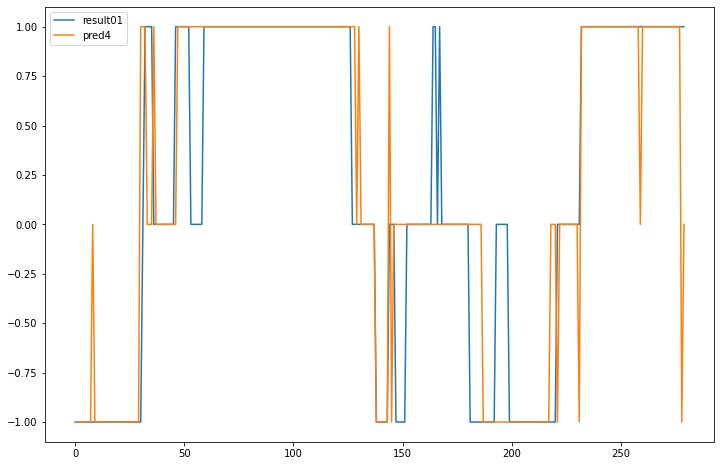

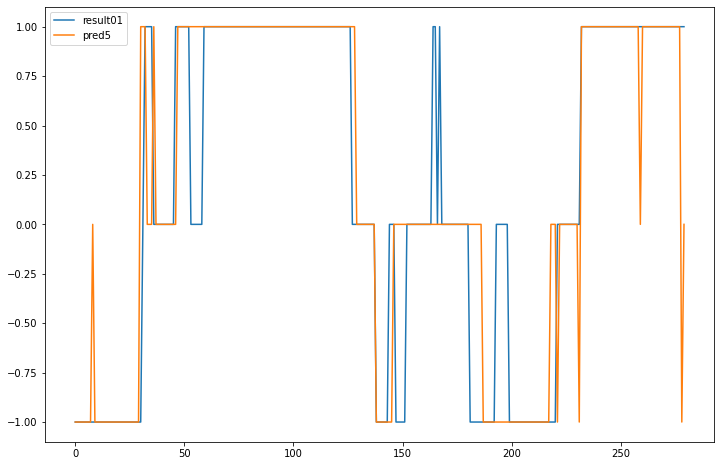

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/AMD_dataset00.csv")
df.info()

from sklearn.model_selection import train_test_split

X = df.iloc[:,1:7].values
y = df['result02'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(random_state=0)
parameters = {'kernel' : ['linear','rbf', 'sigmoid','poly'],
    'C' : [0.001,0.01,0.1,1,10,25,50,100],
    'gamma' : [0.001,0.01,0.1,1,10,25,50,100]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv=5)
grid_svm.fit(X_train,y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
results = result.sort_values(by='mean_test_score', ascending=False)
print("\n",results)
print("\n최적 파라미터 값을 적용합니다 ...\n")

data = results.values[0]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc4 = SVC(C = C, gamma = gamma, kernel = kernel)
svc4.fit(X_train, y_train)

print("훈련 정확도 :", svc4.score(X_train, y_train))
print("예측 정확도 :", svc4.score(X_test, y_test))

from sklearn.metrics import confusion_matrix

prediction = svc4.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)

print("\n다섯 번째 파라미터 값을 적용합니다 ...\n")

data = results.values[4]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc5 = SVC(C = C, gamma = gamma, kernel = kernel)
svc5.fit(X_train, y_train)

print("훈련 정확도 :", svc5.score(X_train, y_train))
print("예측 정확도 :", svc5.score(X_test, y_test))

from sklearn.metrics import confusion_matrix

prediction = svc5.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)
print("\n")

model4_pred = svc4.predict(X)
model5_pred = svc5.predict(X)
pred_04 = np.zeros(len(model4_pred))
pred_05 = np.zeros(len(model5_pred))

for i in range(len(model4_pred)) :
  pred_04[i] = model4_pred[i]
  pred_05[i] = model5_pred[i]

df['pred4'] = pd.Series(pred_04)
df['pred5'] = pd.Series(pred_05)

df.to_csv("/content/gdrive/My Drive/AMD_dataset2.csv", index=False)

df = pd.read_csv("/content/gdrive/My Drive/AMD_dataset2.csv")
print(df)

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred4'], label = 'pred4')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred5'], label = 'pred5')
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/INTC_dataset00.csv")
df.info()

from sklearn.model_selection import train_test_split

X = df.iloc[:,1:7].values
y = df['result02'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(random_state=0)
parameters = {'kernel' : ['linear','rbf', 'sigmoid','poly'],
    'C' : [0.001,0.01,0.1,1,10,25,50,100],
    'gamma' : [0.001,0.01,0.1,1,10,25,50,100]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv=5)
grid_svm.fit(X_train,y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
results = result.sort_values(by='mean_test_score', ascending=False)
print("\n",results)
print("\n최적 파라미터 값을 적용합니다 ...\n")

data = results.values[0]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc4 = SVC(C = C, gamma = gamma, kernel = kernel)
svc4.fit(X_train, y_train)

print("훈련 정확도 :", svc4.score(X_train, y_train))
print("예측 정확도 :", svc4.score(X_test, y_test))

from sklearn.metrics import confusion_matrix

prediction = svc4.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)

print("\n다섯 번째 파라미터 값을 적용합니다 ...\n")

data = results.values[4]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc5 = SVC(C = C, gamma = gamma, kernel = kernel)
svc5.fit(X_train, y_train)

print("훈련 정확도 :", svc5.score(X_train, y_train))
print("예측 정확도 :", svc5.score(X_test, y_test))

from sklearn.metrics import confusion_matrix

prediction = svc5.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)
print("\n")

model4_pred = svc4.predict(X)
model5_pred = svc5.predict(X)
pred_04 = np.zeros(len(model4_pred))
pred_05 = np.zeros(len(model5_pred))

for i in range(len(model4_pred)) :
  pred_04[i] = model4_pred[i]
  pred_05[i] = model5_pred[i]

df['pred4'] = pd.Series(pred_04)
df['pred5'] = pd.Series(pred_05)

df.to_csv("/content/gdrive/My Drive/INTC_dataset2.csv", index=False)

df = pd.read_csv("/content/gdrive/My Drive/INTC_dataset2.csv")
print(df)

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred4'], label = 'pred4')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred5'], label = 'pred5')
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      280 non-null    int64  
 1   pred1     280 non-null    float64
 2   pred1r    280 non-null    float64
 3   pred2     280 non-null    float64
 4   pred2r    280 non-null    float64
 5   pred3     280 non-null    float64
 6   pred3r    280 non-null    float64
 7   result01  280 non-null    float64
 8   result02  280 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 19.8 KB


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/AMZN_dataset00.csv")
df.info()

from sklearn.model_selection import train_test_split

X = df.iloc[:,1:7].values
y = df['result02'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(random_state=0)
parameters = {'kernel' : ['linear','rbf', 'sigmoid','poly'],
    'C' : [0.001,0.01,0.1,1,10,25,50,100],
    'gamma' : [0.001,0.01,0.1,1,10,25,50,100]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv=5)
grid_svm.fit(X_train,y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
results = result.sort_values(by='mean_test_score', ascending=False)
print("\n",results)
print("\n최적 파라미터 값을 적용합니다 ...\n")

data = results.values[0]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc4 = SVC(C = C, gamma = gamma, kernel = kernel)
svc4.fit(X_train, y_train)

print("훈련 정확도 :", svc4.score(X_train, y_train))
print("예측 정확도 :", svc4.score(X_test, y_test))

from sklearn.metrics import confusion_matrix

prediction = svc4.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)

print("\n다섯 번째 파라미터 값을 적용합니다 ...\n")

data = results.values[4]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc5 = SVC(C = C, gamma = gamma, kernel = kernel)
svc5.fit(X_train, y_train)

print("훈련 정확도 :", svc5.score(X_train, y_train))
print("예측 정확도 :", svc5.score(X_test, y_test))

from sklearn.metrics import confusion_matrix

prediction = svc5.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)
print("\n")

model4_pred = svc4.predict(X)
model5_pred = svc5.predict(X)
pred_04 = np.zeros(len(model4_pred))
pred_05 = np.zeros(len(model5_pred))

for i in range(len(model4_pred)) :
  pred_04[i] = model4_pred[i]
  pred_05[i] = model5_pred[i]

df['pred4'] = pd.Series(pred_04)
df['pred5'] = pd.Series(pred_05)

df.to_csv("/content/gdrive/My Drive/AMZN_dataset2.csv", index=False)

df = pd.read_csv("/content/gdrive/My Drive/AMZN_dataset2.csv")
print(df)

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred4'], label = 'pred4')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred5'], label = 'pred5')
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/AAPL_dataset00.csv")
df.info()

from sklearn.model_selection import train_test_split

X = df.iloc[:,1:7].values
y = df['result02'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(random_state=0)
parameters = {'kernel' : ['linear','rbf', 'sigmoid','poly'],
    'C' : [0.001,0.01,0.1,1,10,25,50,100],
    'gamma' : [0.001,0.01,0.1,1,10,25,50,100]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv=5)
grid_svm.fit(X_train,y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
results = result.sort_values(by='mean_test_score', ascending=False)
print("\n",results)
print("\n최적 파라미터 값을 적용합니다 ...\n")

data = results.values[0]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc4 = SVC(C = C, gamma = gamma, kernel = kernel)
svc4.fit(X_train, y_train)

print("훈련 정확도 :", svc4.score(X_train, y_train))
print("예측 정확도 :", svc4.score(X_test, y_test))

from sklearn.metrics import confusion_matrix

prediction = svc4.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)

print("\n다섯 번째 파라미터 값을 적용합니다 ...\n")

data = results.values[4]
C = data[0]
gamma = data[1]
kernel = data[2]

from sklearn.svm import SVC

svc5 = SVC(C = C, gamma = gamma, kernel = kernel)
svc5.fit(X_train, y_train)

print("훈련 정확도 :", svc5.score(X_train, y_train))
print("예측 정확도 :", svc5.score(X_test, y_test))

from sklearn.metrics import confusion_matrix

prediction = svc5.predict(X)
confusion = confusion_matrix(y_true=y, y_pred=prediction)
print("\n",confusion)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, prediction, average="macro")
print("\nprecision_score :", precision)

recall = recall_score(y, prediction, average="macro")
print("recall_score :", recall)

f1_score = f1_score(y, prediction, average="macro")
print("f1_score :",f1_score)
print("\n")

model4_pred = svc4.predict(X)
model5_pred = svc5.predict(X)
pred_04 = np.zeros(len(model4_pred))
pred_05 = np.zeros(len(model5_pred))

for i in range(len(model4_pred)) :
  pred_04[i] = model4_pred[i]
  pred_05[i] = model5_pred[i]

df['pred4'] = pd.Series(pred_04)
df['pred5'] = pd.Series(pred_05)

df.to_csv("/content/gdrive/My Drive/AAPL_dataset2.csv", index=False)

df = pd.read_csv("/content/gdrive/My Drive/AAPL_dataset2.csv")
print(df)

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred4'], label = 'pred4')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(df['result02'],label = 'result01')
plt.plot(df['pred5'], label = 'pred5')
plt.legend()
plt.show()